# Analysis of Mark Nanquil

## Data Preparation

Load Python libraries

In [1]:
#display all rows and columns in pandas
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#remove warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

Import the data into a pandas dataframe and perform formatting on the date column

In [2]:
#import data
df         = pd.read_csv('~/Downloads/991f8fa088a1b072.csv')
df['DATE'] = pd.to_datetime(df['DATE'],format='%Y%m%d') 

Check the data types

In [3]:
df.dtypes

FS_PERM_SEC_ID              object
ENTITY_NAME                 object
FF_MKT_VAL_CURR            float64
FF_CURR_PS_CF              float64
FF_PBK_SECS_CURR           float64
FF_PE_SECS_CURR            float64
DATE                datetime64[ns]
FF_SALES                   float64
FF_NET_INCOME              float64
FF_ASSETS                  float64
FF_DFD_TAX_ITC             float64
FF_DEBT                    float64
FF_EPS_REPORTED            float64
FF_EQ_TOT                  float64
FF_EPS_BASIC               float64
FF_COGS                    float64
FF_CAPEX                   float64
dtype: object

Preview the first 5 rows of the data (for sanity checking only)

In [4]:
df.head()

,FS_PERM_SEC_ID,ENTITY_NAME,FF_MKT_VAL_CURR,FF_CURR_PS_CF,FF_PBK_SECS_CURR,FF_PE_SECS_CURR,DATE,FF_SALES,FF_NET_INCOME,FF_ASSETS,FF_DFD_TAX_ITC,FF_DEBT,FF_EPS_REPORTED,FF_EQ_TOT,FF_EPS_BASIC,FF_COGS,FF_CAPEX
0,HKS27K-S-US,CHOICEONE FINANCIAL SERVICES INC,94.1031,2.589208,1.30403,15.2072,2017-12-31,28.944,6.168,646.544,NaN,27.416,1.6952,76.550,1.7048,NaN,1.656
1,T1N9J9-S-US,1ST SOURCE CORP,1458.4500,4.901868,1.97015,19.2363,2017-12-31,309.696,67.531,5915.351,2.670,343.419,2.6000,718.537,2.6000,NaN,51.447
2,WHQNFK-S-US,AAR CORP,1612.2800,3.601036,1.75654,107.0590,2017-05-31,1767.600,56.000,1552.500,37.200,157.300,1.6400,914.200,1.6519,1493.700,33.600
3,RK3780-S-US,AARONS INC,3182.1000,32.947366,1.82330,11.2745,2017-12-31,3383.708,292.536,2692.264,211.003,368.798,4.0600,1728.004,4.1300,1790.137,57.973
4,Q1KJQ2-S-US,ABBOTT LABORATORIES,114361.0000,2.741859,3.64217,128.9640,2017-12-31,27390.000,468.000,76250.000,2006.000,27924.000,0.2700,31098.000,0.2690,14266.000,1135.000


We will now create a dataframe with all the numerical features and drop observations with missing data. In general -- missing data are handled through imputation techniques. We do not recommend this on this dataset as there are some features (i.e. COGS) that are not applicable to some observations (i.e. service-oriented companies). This data pre-processing is essential in performing PCA.

In [5]:
#Create a dataframe of all numerical features
df1 = df[['FF_MKT_VAL_CURR'  
        ,'FF_CURR_PS_CF'     
        ,'FF_PBK_SECS_CURR'  
        ,'FF_PE_SECS_CURR'   
        ,'FF_SALES'          
        ,'FF_NET_INCOME'     
        ,'FF_ASSETS'         
        ,'FF_DFD_TAX_ITC'    
        ,'FF_DEBT'           
        ,'FF_EPS_REPORTED'   
        ,'FF_EQ_TOT'         
        ,'FF_EPS_BASIC'      
        ,'FF_COGS'           
        ,'FF_CAPEX']]

#Drop NAs
df2 = df1.dropna(axis='rows')

In [6]:
#check number of rows and columns
df2.shape

(2269, 14)

## Principal Component Analysis

We will now perform Principal Component Analysis (PCA). Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible

In [7]:
#Perform PCA
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df2)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
pca_fit_df = pca.fit(df_scaled)

In [9]:
exp_var_ratio         = pca_fit_df.explained_variance_ratio_
cum_sum_exp_var_ratio = np.cumsum(pca_fit_df.explained_variance_ratio_) 

var_data              = pd.DataFrame(data=[exp_var_ratio, cum_sum_exp_var_ratio], 
                                     columns=['Num of PCs: 1'
                                              , 'Num of PCs: 2'
                                              , 'Num of PCs: 3'
                                              , 'Num of PCs: 4'
                                              , 'Num of PCs: 5'
                                              , 'Num of PCs: 6'
                                              , 'Num of PCs: 7'
                                              , 'Num of PCs: 8'
                                              , 'Num of PCs: 9'
                                              , 'Num of PCs: 10'
                                              , 'Num of PCs: 11'
                                              , 'Num of PCs: 12'
                                              , 'Num of PCs: 13'
                                              , 'Num of PCs: 14'
                                             ])
var_data.round(6)
row_names      = pd.DataFrame(['Explained Variance Ratio', 'Cumulative Explained Variance Ratio'],columns=[''])
final_expl_var = pd.concat([row_names, var_data],axis=1)
final_expl_var.style.format({'Num of PCs: 1': '{:.4%}'
                       , 'Num of PCs: 2': '{:.4%}'
                       , 'Num of PCs: 3': '{:.4%}'
                       , 'Num of PCs: 4': '{:.4%}'
                       , 'Num of PCs: 5': '{:.4%}'
                       , 'Num of PCs: 6': '{:.4%}'
                       , 'Num of PCs: 7': '{:.4%}'
                       , 'Num of PCs: 8': '{:.4%}'
                       , 'Num of PCs: 9': '{:.4%}'
                       , 'Num of PCs: 10': '{:.4%}'
                       , 'Num of PCs: 11': '{:.4%}'
                       , 'Num of PCs: 12': '{:.4%}'
                       , 'Num of PCs: 13': '{:.4%}'
                       , 'Num of PCs: 14': '{:.4%}'}).hide_index()

,Num of PCs: 1,Num of PCs: 2,Num of PCs: 3,Num of PCs: 4,Num of PCs: 5,Num of PCs: 6,Num of PCs: 7,Num of PCs: 8,Num of PCs: 9,Num of PCs: 10,Num of PCs: 11,Num of PCs: 12,Num of PCs: 13,Num of PCs: 14
Explained Variance Ratio,59.4565%,15.3753%,8.5177%,8.3851%,5.7692%,1.9114%,0.4116%,0.1361%,0.0268%,0.0062%,0.0027%,0.0010%,0.0003%,0.0001%
Cumulative Explained Variance Ratio,59.4565%,74.8318%,83.3495%,91.7346%,97.5038%,99.4153%,99.8269%,99.9629%,99.9897%,99.9959%,99.9986%,99.9996%,99.9999%,100.0000%


From the results above, we can see that for 5 principal components, the explained variance is already 97.5%. As such, we will use 5 principal components in identifying the features of the dataset. The script below will produce the eigenvectors for each principal component and feature.

In [10]:
variable_names      = pd.DataFrame(df1.columns, columns=['Variable Name'])
column_names        = ['PC1', 'PC2' ,'PC3', 'PC4', 'PC5', 'PC6', 'PC7'
                        ,'PC8', 'PC9' ,'PC10', 'PC11', 'PC12', 'PC13', 'PC14']

eigenvectors        = pca_fit_df.components_
eigenvectors_tbl_0  = pd.DataFrame(data=eigenvectors, columns=column_names) 
eigenvectors_tbl_1  = pd.concat([variable_names, eigenvectors_tbl_0], axis=1)
eigenvectors_tbl_2  = eigenvectors_tbl_1[['Variable Name', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

In [11]:
eigenvectors_tbl_2.style.background_gradient('Blues').hide_index()

Variable Name,PC1,PC2,PC3,PC4,PC5
FF_MKT_VAL_CURR,0.318291,0.245706,-0.004324,-0.004186,0.328758
FF_CURR_PS_CF,-0.176680,0.403517,-0.008360,-0.018506,-0.006609
FF_PBK_SECS_CURR,-0.058155,0.073509,0.687287,0.691409,0.061099
FF_PE_SECS_CURR,-0.254912,0.280283,-0.167917,-0.145749,0.257282
FF_SALES,0.000023,0.002046,0.706639,-0.707345,0.003735
FF_NET_INCOME,-0.143287,0.374764,0.000797,-0.003192,0.239493
FF_ASSETS,0.020434,0.110666,0.000363,0.000913,0.077742
FF_DFD_TAX_ITC,0.296193,0.723382,-0.001492,0.001500,-0.336318
FF_DEBT,0.720574,-0.122641,-0.002558,0.000448,0.200999
FF_EPS_REPORTED,-0.090927,0.040333,-0.001037,0.000802,0.261174


From the table above, for PC1 -- the highest correlation is FF_DEBT. For PC2 -- the highest correlation is FF_DFD_TAX_ITC. PC3 and PC4 have both highest correlation for FF_PBK_SECS_CURR and FF_SALES. Finally, PC5 has the highest correlation for FF_CAPEX. These are the variables that we will use to perform kmeans clustering on the data.

## K-means clustering

K-means is a clustering technique which is often used in segmenting data. Typical K-means algorithm works by first, defining K or the number of clusters. Based on the value of K, centroids will be calculated where each cluster is concentrated. Each observation will then be allocated to a cluster with the minimum distrance to a centroid.

Data Pre-processing

In [12]:
df_for_kmeans1 = df[['ENTITY_NAME'
                   ,'FF_DEBT'
                   , 'FF_DFD_TAX_ITC'
                   , 'FF_PBK_SECS_CURR'
                   , 'FF_SALES'
                   , 'FF_CAPEX']]
df_for_kmeans1.shape

(9745, 6)

In [13]:
df_for_kmeans2 = df_for_kmeans1.dropna(axis='rows')
df_for_kmeans2.shape

(4035, 6)

In [14]:
df_for_kmeans3 = df_for_kmeans2[['FF_DEBT'
                   , 'FF_DFD_TAX_ITC'
                   , 'FF_PBK_SECS_CURR'
                   , 'FF_SALES'
                   , 'FF_CAPEX']]

Perform normalization of the data.

In [15]:
df_for_kmeans4 = df_for_kmeans3.replace(0,1)

df_for_kmeans4['ln_FFT_DEBT']         = np.log(df_for_kmeans4['FF_DEBT'])
df_for_kmeans4['ln_FF_DFD_TAX_ITC']   = np.log(df_for_kmeans4['FF_DFD_TAX_ITC'])
df_for_kmeans4['ln_FF_PBK_SECS_CURR'] = np.log(df_for_kmeans4['FF_PBK_SECS_CURR'])
df_for_kmeans4['ln_FF_SALES']         = np.log(df_for_kmeans4['FF_SALES'])
df_for_kmeans4['ln_FF_CAPEX']         = np.log(df_for_kmeans4['FF_CAPEX'])

df_for_kmeans_t = df_for_kmeans4[['ln_FFT_DEBT'
                                  , 'ln_FF_DFD_TAX_ITC'
                                  , 'ln_FF_PBK_SECS_CURR'
                                  , 'ln_FF_SALES'
                                  , 'ln_FF_CAPEX']]

In [16]:
df_for_kmeans_final = df_for_kmeans_t.fillna(0)

Final data check before performing K-means clustering.

In [17]:
df_for_kmeans_final.describe()

,ln_FFT_DEBT,ln_FF_DFD_TAX_ITC,ln_FF_PBK_SECS_CURR,ln_FF_SALES,ln_FF_CAPEX
count,4035.000000,4035.000000,4035.000000,4035.000000,4035.000000
mean,4.579393,1.667109,0.767712,5.853100,2.686338
std,3.317775,2.629915,0.993842,2.758890,2.884683
min,-9.845219,-6.907755,-7.676525,-4.927858,-8.274247
25%,1.846044,0.000000,0.184565,4.084326,0.536567
50%,5.034658,0.000000,0.644550,6.110753,2.809149
75%,7.076882,3.515537,1.287551,7.693022,4.653960
max,17.423757,14.187593,6.684612,17.848738,16.234192


Perform K-means clustering.

In [18]:
from sklearn.cluster import KMeans
kmeans_algo = KMeans(n_clusters=4, random_state=3141593).fit(df_for_kmeans_final)

Output of the four centroids.

In [19]:
kmeans_algo.cluster_centers_

array([[ 8.38721977,  6.01259149,  0.88377271,  8.88598171,  6.15481648],
       [ 3.13608307,  0.66834811,  0.72243815,  5.21876095,  1.79400055],
       [ 6.73111264,  1.47544047,  0.89273969,  7.41720981,  4.07354878],
       [ 0.54771909, -0.19229002,  0.56351651,  2.08498613, -0.81252519]])

Algorithm parameters.

In [20]:
kmeans_algo.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3141593, tol=0.0001, verbose=0)>

Data preparation for analysis.

In [21]:
kmeans_label = pd.DataFrame(data = kmeans_algo.labels_, columns=['Cluster'])

In [23]:
cluster_results0     = pd.DataFrame(['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], columns=['cluster_results'])
cluster_results1     = pd.DataFrame(np.array(kmeans_label.groupby('Cluster')['Cluster'].count()), columns=['count'])
cluster_results_grph = pd.concat([cluster_results0, cluster_results1], axis=1)

Sanity check to see if the data points are not concentrated in one cluster.

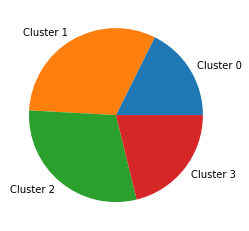

In [24]:
import matplotlib
import matplotlib.pyplot as plt

plt.pie(cluster_results_grph['count'],labels=cluster_results_grph['cluster_results'])
plt.show()

Identify the attributes of each cluster.

In [25]:
df_reset_index = df_for_kmeans2.reset_index()

In [26]:
clustered_data = pd.concat([kmeans_label, df_reset_index], axis=1)

In [27]:
cluster_zero  = clustered_data[clustered_data['Cluster']==0]
cluster_one   = clustered_data[clustered_data['Cluster']==1]
cluster_two   = clustered_data[clustered_data['Cluster']==2]
cluster_three = clustered_data[clustered_data['Cluster']==3]

In [28]:
cluster_zero[['FF_DEBT'
            , 'FF_DFD_TAX_ITC'
            , 'FF_PBK_SECS_CURR'
            , 'FF_SALES'
            , 'FF_CAPEX']].describe()

,FF_DEBT,FF_DFD_TAX_ITC,FF_PBK_SECS_CURR,FF_SALES,FF_CAPEX
count,7.120000e+02,7.120000e+02,712.000000,7.120000e+02,7.120000e+02
mean,1.454312e+05,4.546666e+03,4.061567,2.492931e+05,3.663622e+04
std,1.803903e+06,6.974806e+04,10.302363,2.921731e+06,5.172301e+05
min,0.000000e+00,-3.677170e+05,0.228809,6.795700e+01,0.000000e+00
25%,1.617126e+03,1.603425e+02,1.452205,2.418510e+03,1.597750e+02
50%,3.448368e+03,3.736570e+02,2.261240,5.829500e+03,3.888720e+02
75%,1.012262e+04,1.145750e+03,3.527687,1.451485e+04,1.354181e+03
max,3.690129e+07,1.450752e+06,165.954000,5.644280e+07,1.123104e+07


In [29]:
cluster_one[['FF_DEBT'
             , 'FF_DFD_TAX_ITC'
             , 'FF_PBK_SECS_CURR'
             , 'FF_SALES'
             , 'FF_CAPEX']].describe()

,FF_DEBT,FF_DFD_TAX_ITC,FF_PBK_SECS_CURR,FF_SALES,FF_CAPEX
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,96.629211,-0.715748,4.033472,435.063774,18.435832
std,212.792141,45.515796,18.202604,1353.138062,49.177881
min,0.000000,-429.212000,0.068641,0.000000,0.000000
25%,5.196500,-7.164000,1.182405,77.147065,2.199713
50%,36.559320,-0.740000,1.712130,181.745000,6.093000
75%,103.340458,3.326636,3.320275,410.017500,16.667000
max,4785.756000,932.593000,598.997000,36446.757000,943.116245


In [30]:
cluster_two[['FF_DEBT'
             , 'FF_DFD_TAX_ITC'
             , 'FF_PBK_SECS_CURR'
             , 'FF_SALES'
             , 'FF_CAPEX']].describe()

,FF_DEBT,FF_DFD_TAX_ITC,FF_PBK_SECS_CURR,FF_SALES,FF_CAPEX
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,3968.170233,-130.675438,5.455204,4691.514371,217.162839
std,23226.295106,685.937769,28.331170,11638.846257,671.388094
min,5.325000,-14033.000000,0.056981,32.829272,0.000000
25%,315.899500,-66.004250,1.342040,698.268000,25.520519
50%,680.003000,-0.378997,2.251685,1453.001500,55.826500
75%,1811.693750,26.825250,4.148870,3261.575000,145.336750
max,520879.000000,493.787000,800.000000,142202.000000,13184.000000


In [31]:
cluster_three[['FF_DEBT'
               , 'FF_DFD_TAX_ITC'
               , 'FF_PBK_SECS_CURR'
               , 'FF_SALES'
               , 'FF_CAPEX']].describe()

,FF_DEBT,FF_DFD_TAX_ITC,FF_PBK_SECS_CURR,FF_SALES,FF_CAPEX
count,854.000000,854.000000,854.000000,854.000000,854.000000
mean,6.996442,-0.131268,5.287307,24.485097,1.647484
std,25.221067,6.738350,28.712433,48.622123,6.067634
min,0.000000,-76.703000,0.000464,-617.680000,0.000000
25%,0.000000,-0.719081,0.927600,0.650977,0.061537
50%,0.163779,0.000000,1.491420,12.703757,0.356990
75%,4.958500,0.513750,3.156313,28.806000,1.163500
max,509.622093,78.502000,682.759000,533.295100,119.126000


## Cluster Descriptions

In [99]:
cluster0_df = pd.DataFrame(cluster_zero[['FF_DEBT'
            , 'FF_DFD_TAX_ITC'
            , 'FF_PBK_SECS_CURR'
            , 'FF_SALES'
            , 'FF_CAPEX']].describe()).loc[['mean']]

cluster1_df = pd.DataFrame(cluster_one[['FF_DEBT'
            , 'FF_DFD_TAX_ITC'
            , 'FF_PBK_SECS_CURR'
            , 'FF_SALES'
            , 'FF_CAPEX']].describe()).loc[['mean']]

cluster2_df = pd.DataFrame(cluster_two[['FF_DEBT'
            , 'FF_DFD_TAX_ITC'
            , 'FF_PBK_SECS_CURR'
            , 'FF_SALES'
            , 'FF_CAPEX']].describe()).loc[['mean']]

cluster3_df = pd.DataFrame(cluster_three[['FF_DEBT'
            , 'FF_DFD_TAX_ITC'
            , 'FF_PBK_SECS_CURR'
            , 'FF_SALES'
            , 'FF_CAPEX']].describe()).loc[['mean']]

In [100]:
means_data  = pd.concat([cluster0_df, cluster1_df, cluster2_df, cluster3_df])
means_data1 = means_data.reset_index()
means_data2 = means_data1[['FF_DEBT', 'FF_DFD_TAX_ITC', 'FF_PBK_SECS_CURR', 'FF_SALES', 'FF_CAPEX']]

In [101]:
cluster_name = pd.DataFrame(np.array([0,1,2,3]), columns=['cluster_name'])

In [102]:
summary_clusters = pd.concat([cluster_name, means_data2], axis=1)

In [103]:
summary_cluster_df4

,cluster_name,FF_DEBT,FF_DFD_TAX_ITC,FF_PBK_SECS_CURR,FF_SALES,FF_CAPEX
0,0,145431.247402,4546.665521,4.061567,249293.132766,36636.218095
1,1,96.629211,-0.715748,4.033472,435.063774,18.435832
2,2,3968.170233,-130.675438,5.455204,4691.514371,217.162839
3,3,6.996442,-0.131268,5.287307,24.485097,1.647484


Below are the cluster descriptions:

Cluster 0: Tier 1 companies - Highest average sales revenue, highest average CAPEX spending among all the clusters. Only cluster with positive deferred tax. On average, CAPEX is 25% of debt - highest among all clusters.

Cluster 1: Tier 3 companies - Average sales revenue of  435M, average CAPEX spending of 18M. On average, CAPEX is 18.75% of debt.

Cluster 2: Tier 2 companies - Average sales revenue of 4.7B, average CAPEX spending of 217M. Cluster with the most negative deferred tax. On average, CAPEX is 5.4% of debt - lowest among all clusters.

Cluster 3: Tier 4 companies - Average sales revenue of 24M, average CAPEX spending of 1.6M. On average, CAPEX is 23% of debt.